In [3]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import math
import numpy as np
from scipy.stats import boxcox

In [4]:
# Load the dataset
data = fetch_california_housing(as_frame=True)

# # Get features and target
df = data.frame

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [5]:
df.shape

(20640, 9)

In [6]:
## Row : one block
## column : 
#   median income of block, 
#   median house age, 
#   avg room in a house - median, 
#   avg bedrooms - median, 
#   population, 
#   avg occc : avg number of people => population / households
#   latitude/ longtitude
#   target is the median house value of the block


## all are numerical features

In [7]:
## 1. missing values -> dont have to deal with any missing values

df.isna().sum()/ df.count()

df.count()

MedInc         20640
HouseAge       20640
AveRooms       20640
AveBedrms      20640
Population     20640
AveOccup       20640
Latitude       20640
Longitude      20640
MedHouseVal    20640
dtype: int64

#### We know till now that we have 20k rows, 8 features and we need to predict median house value of a block
#### THere are no null values
#### All are numerical features

In [8]:
## lets do EDA now to understand the data better
## 1. plotting linear relationship with target and feature variables
## 2. plotting distribution
## 3. box plot


In [9]:
numerical_feautres = df.select_dtypes(['number','int64','float64']).columns.tolist()

target = 'MedHouseVal'
# numerical_feautres.remove('MedHouseVal')



3


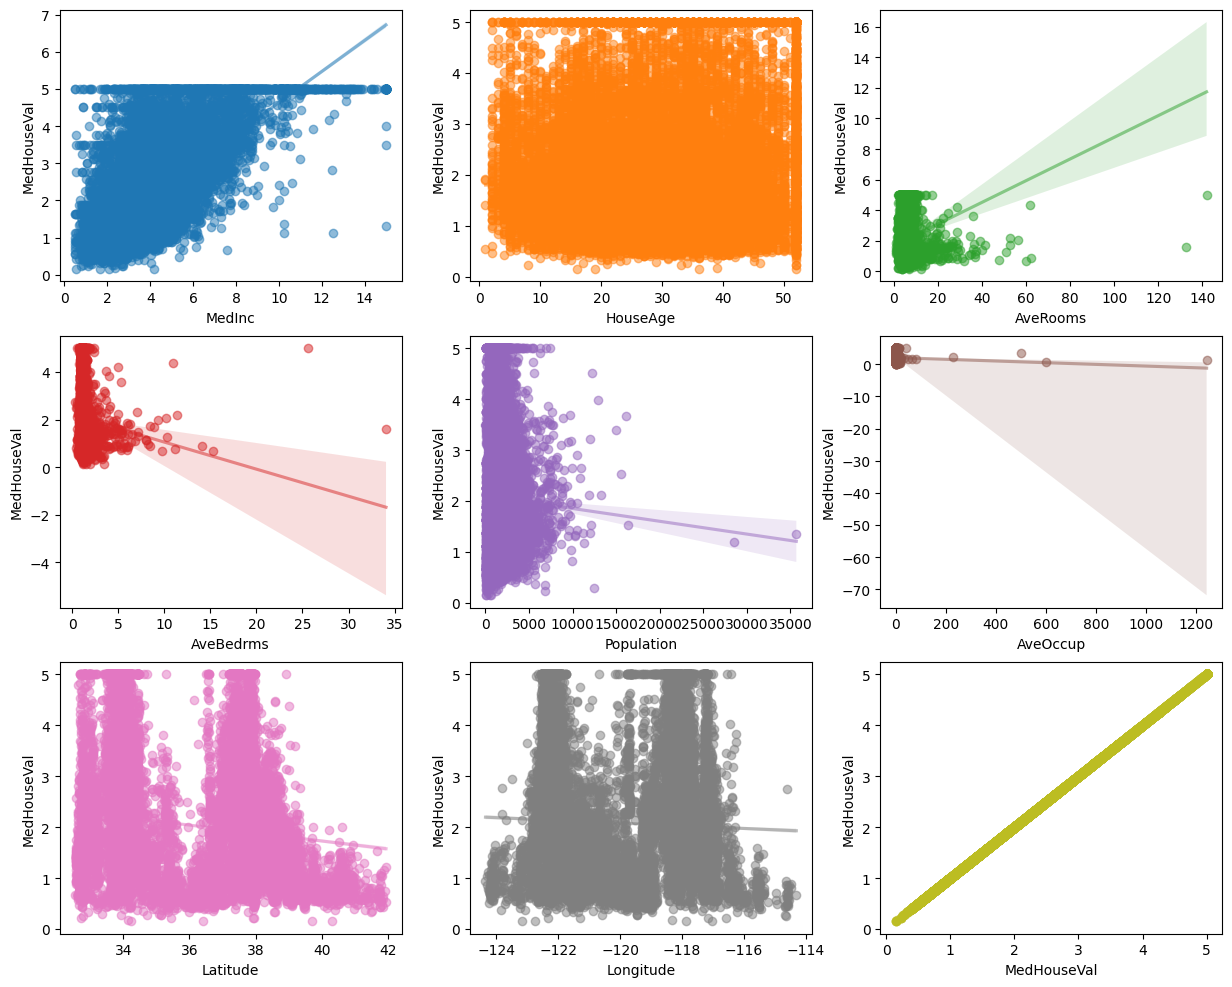

In [10]:
## 1. plotting linear relationship with target and feature variables

n_figures = math.ceil(math.sqrt(len(numerical_feautres)))

print(n_figures)

fig, axes = plt.subplots(n_figures,n_figures, figsize=(15, 12))

color_palette = sns.color_palette("tab10", 10)
colors_array = color_palette.as_hex()

for i,feature in enumerate(numerical_feautres):
    
    ax = axes[i//n_figures, i%n_figures]
    sns.regplot(x=df[feature], y=df[target], ax=ax, color=colors_array[i], scatter_kws={'alpha':0.5},  line_kws={'alpha':0.5} 
)
    



#### 1. If medinc there is an inc in medianhouseval...however cant really read much in graph....there is a cap of median house value at 5
#### 2. houseage and medianhouseval have no linear relationship..it is randomly spread acorss
#### 3. avgroom has slightly positive medianhouseval...there is not much pattern. there are many outlier 
#### 4. 

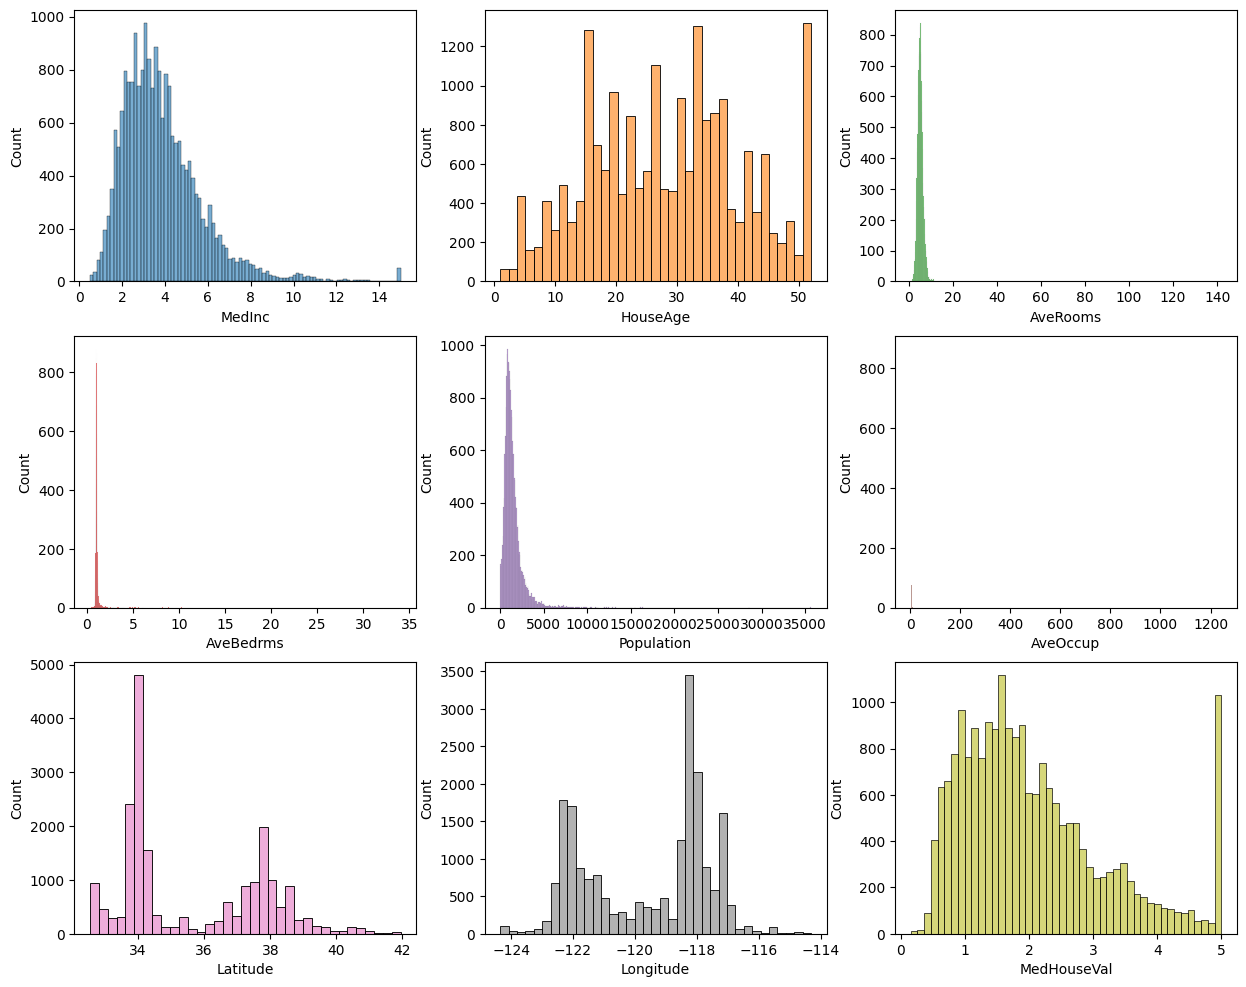

In [11]:
n_figures = math.ceil(math.sqrt(len(numerical_feautres)))

fig, axes = plt.subplots(n_figures,n_figures,figsize=(15,12))

for i,feature in enumerate(numerical_feautres):
    ax = axes[i//n_figures, i%n_figures]
    sns.histplot(df[feature],color=color_palette[i], alpha=0.6, ax=ax)

In [12]:
#### Rightskewed - > medinc, averooms, avebedrooms, population, avgoccup
#### outliers are seen
#### location is mostly towards one or two area..and not evenly distributed
### houseage is bit fairly distribution

skew_threshold=0.5
skew_scores = df[numerical_feautres].skew()
print('overall score',skew_scores)

print("Skewed features:\n", skew_scores[abs(skew_scores) > skew_threshold].index)

df_processed = df.copy()

## since all the non negative values we will chose boxcox
for col in skew_scores[abs(skew_scores)>0.5].index:
    df_processed[col], _ = boxcox(df_processed[col]+1e-10)
## from the skewness score also it concludes the same


overall score MedInc          1.646657
HouseAge        0.060331
AveRooms       20.697869
AveBedrms      31.316956
Population      4.935858
AveOccup       97.639561
Latitude        0.465953
Longitude      -0.297801
MedHouseVal     0.977763
dtype: float64
Skewed features:
 Index(['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'MedHouseVal'],
      dtype='object')


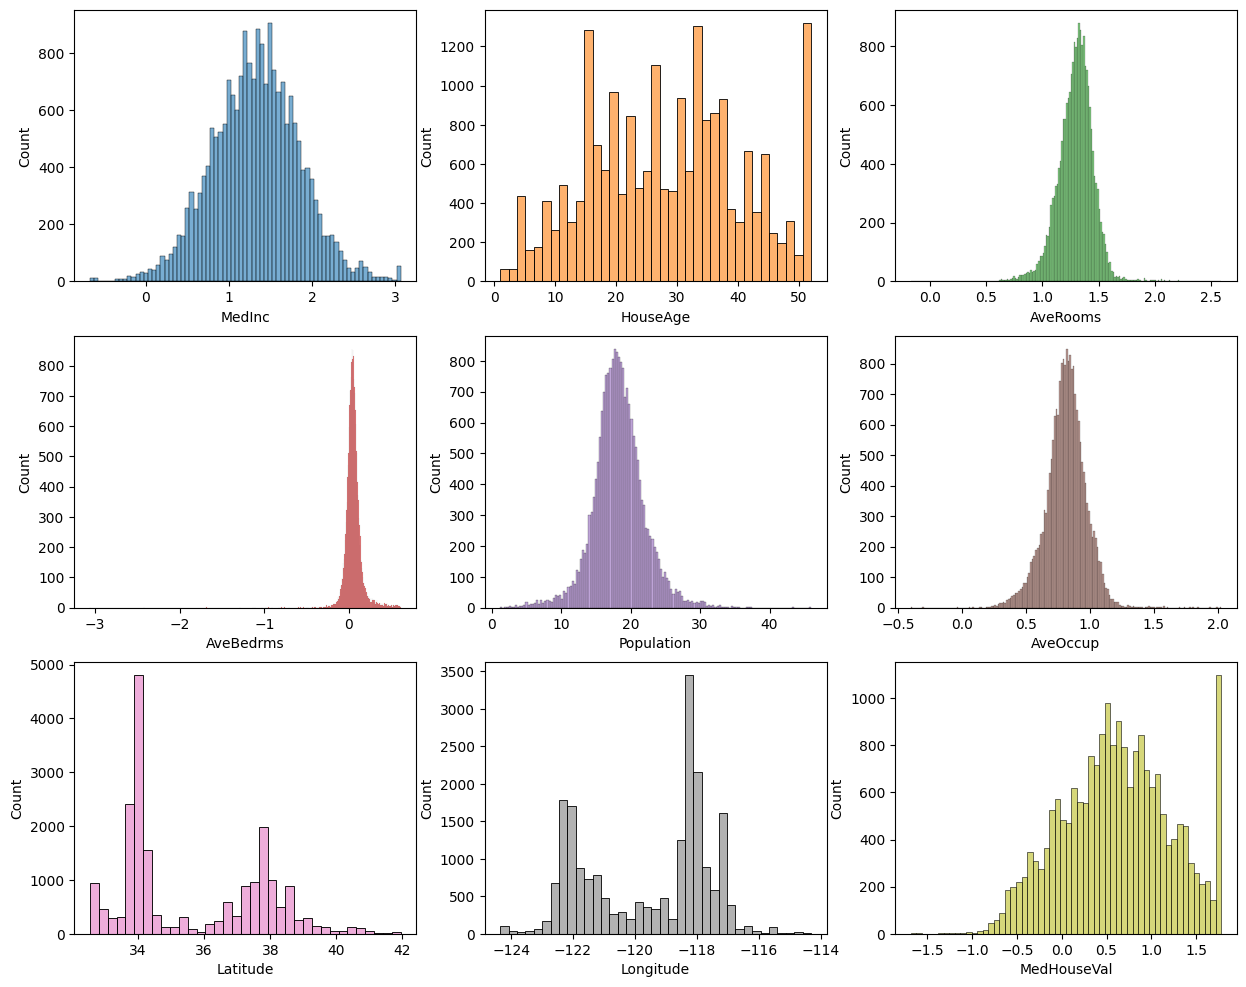

In [13]:
n_figures = math.ceil(math.sqrt(len(numerical_feautres)))

fig, axes = plt.subplots(n_figures,n_figures,figsize=(15,12))

for i,feature in enumerate(numerical_feautres):
    ax = axes[i//n_figures, i%n_figures]
    sns.histplot(df_processed[feature],color=color_palette[i], alpha=0.6, ax=ax)

<Axes: >

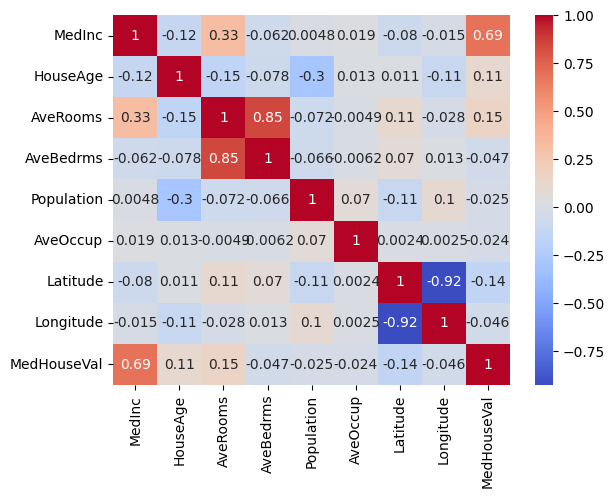

In [14]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [15]:
## AvgRoom and AvgBedRoms are too much correlated -> multicollinear
## Latitude and longitude are too much correlated -> multicollinear



3


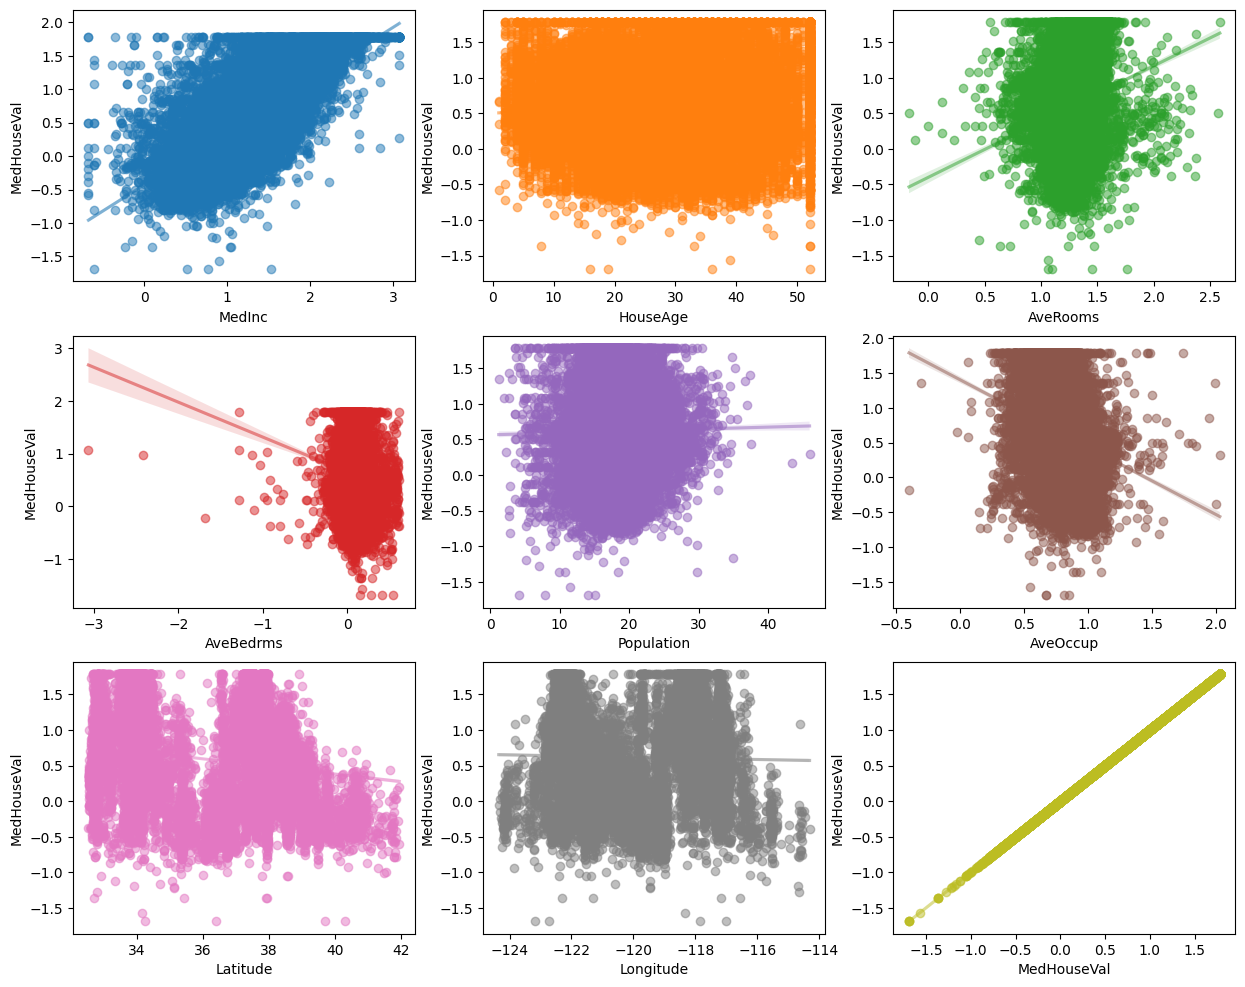

In [16]:
## 1. plotting linear relationship with target and feature variables

n_figures = math.ceil(math.sqrt(len(numerical_feautres)))

print(n_figures)

fig, axes = plt.subplots(n_figures,n_figures, figsize=(15, 12))

color_palette = sns.color_palette("tab10", 10)
colors_array = color_palette.as_hex()

for i,feature in enumerate(numerical_feautres):
    
    ax = axes[i//n_figures, i%n_figures]
    sns.regplot(x=df_processed[feature], y=df_processed[target], ax=ax, color=colors_array[i], scatter_kws={'alpha':0.5},  line_kws={'alpha':0.5} )
    



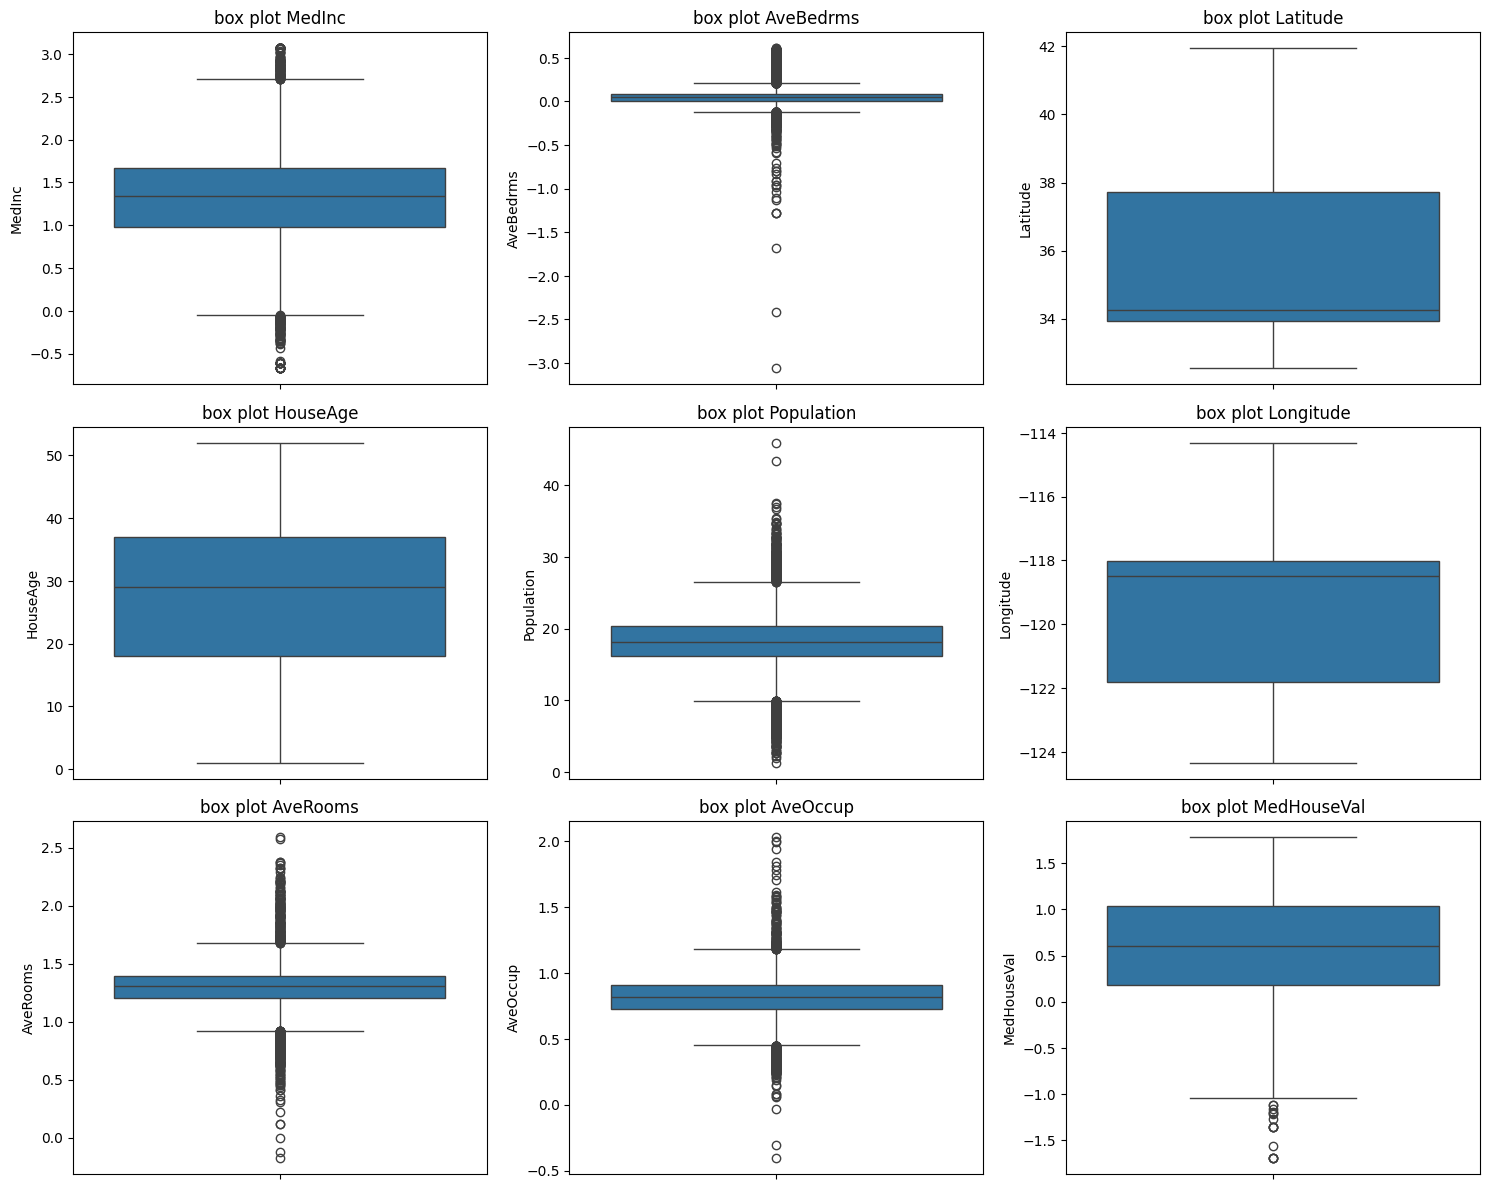

In [17]:
fig, axes = plt.subplots(n_figures,n_figures,figsize=(15,12))

for i,feature in enumerate(numerical_feautres):
    ax = axes[i%n_figures, i//n_figures]
    sns.boxplot(y=df_processed[feature],ax=ax)
    ax.set_title(f'box plot {feature}')

plt.tight_layout()
plt.show()

In [18]:
### capping data for these -> since they show more outlier

for col in ['MedInc', 'AveRooms', 'AveOccup', 'Population']:
    df_processed[col] = df_processed[col].clip(lower=df_processed[col].quantile(0.01), upper=df_processed[col].quantile(0.99))


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_processed[numerical_feautres] = scaler.fit_transform(df_processed[numerical_feautres])

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_mc = df_processed.drop(columns=[target])
X_mc = X_mc.select_dtypes(include=['number'])

X_mc_constants = sm.add_constant(X_mc)

vif_data = pd.DataFrame()
vif_data['feature'] = X_mc.columns

vif_data['VIF'] = [variance_inflation_factor(X_mc_constants, i+1) for i in range(len(X_mc.columns))]

print(vif_data)



      feature        VIF
0      MedInc   2.791097
1    HouseAge   1.265623
2    AveRooms   2.813054
3   AveBedrms   1.441487
4  Population   1.218020
5    AveOccup   1.150941
6    Latitude  10.185817
7   Longitude   9.603973


In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df.drop(columns=[target])  # or your dependent variable
X = X.select_dtypes(include=[float, int])  # numeric only
X = X.dropna()

# Add intercept for statsmodels
import statsmodels.api as sm
X_with_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i+1) for i in range(len(X.columns))]

print(vif_data)
## from which also we can see that AveRooms and AveBedrooms are multicollinear
## and latitude and longitude is multicollinear


      feature       VIF
0      MedInc  2.501295
1    HouseAge  1.241254
2    AveRooms  8.342786
3   AveBedrms  6.994995
4  Population  1.138125
5    AveOccup  1.008324
6    Latitude  9.297624
7   Longitude  8.962263


In [22]:
## drop multicollinear columns
multicollinear_cols  = ['AveRooms','Latitude']
df_processed = df_processed.drop(multicollinear_cols, axis=1)
df_processed.shape

(20640, 7)

In [23]:
### its time to train now

In [24]:
from sklearn.model_selection import train_test_split


X = df_processed.drop(target,axis =1)
y = df_processed[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
print(X_train.shape)
print(X_test.shape)

(14448, 6)
(6192, 6)


In [26]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [27]:
columns = ['intersect'] + list(X.columns.values)
print(columns)

lg_theta = [lin_reg.intercept_] + list(lin_reg.coef_)

for i,col in enumerate(columns):
    print(f'theta_{i} , feature : {col}, coeffient : {lg_theta[i]}')




['intersect', 'MedInc', 'HouseAge', 'AveBedrms', 'Population', 'AveOccup', 'Longitude']
theta_0 , feature : intersect, coeffient : -0.002212598209668051
theta_1 , feature : MedInc, coeffient : 0.7036190377224342
theta_2 , feature : HouseAge, coeffient : 0.21040731215445227
theta_3 , feature : AveBedrms, coeffient : 0.009499482168781504
theta_4 , feature : Population, coeffient : 0.10907714423299357
theta_5 , feature : AveOccup, coeffient : -0.2589701126798743
theta_6 , feature : Longitude, coeffient : 0.031841750799594996


In [28]:
y_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error,mean_absolute_error

lr_mse = mean_squared_error(y_test,y_pred)
lr_mae = mean_absolute_error(y_test,y_pred)

print(f'mse : {lr_mse}, mae : {lr_mae}')

r_square = lin_reg.score(X_test,y_test)
print(f'r_square {r_square}')
n = X_test.shape[0]  # number of observations
p = X_test.shape[1]  # number of predictors


adjusted_r2 = 1 - ((1 - r_square) * (n - 1) / (n - p - 1))

# print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")

mse : 0.435987025079621, mae : 0.5068426949121972
r_square 0.5630316319630584
Adjusted R²: 0.5626


In [29]:
## lets see if the assumptions were satisfied or not


## 
y_mean = np.mean(df[target])
y_variance = np.var(df[target])

print(f'target mean {y_mean} , var : {y_variance}' )

target mean 2.068558169089147 , var : 1.3315503000818076


### MSE = 0.313. This squares the errors, so it’s more sensitive to outliers.

### But again, this is well below the target variance (1.33) — meaning:

### Your model's predictions are much more stable than just using the mean, which is good.

### Good start for a linear model



In [30]:
### lets check the assumption

Text(0, 0.5, 'residual')

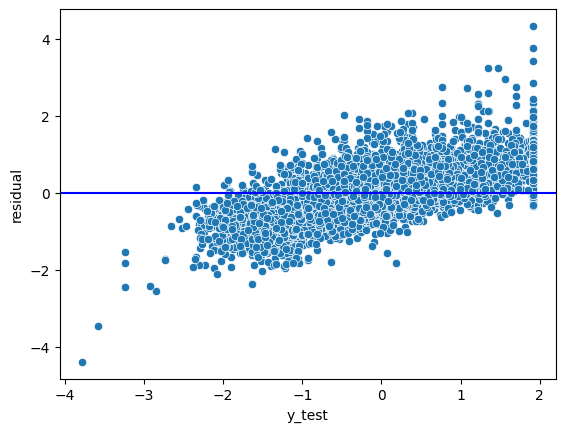

In [31]:
## 1. linearity 


residuals = y_test - y_pred

sns.scatterplot(x=y_test,y=residuals)
plt.axhline(0,color='blue')
plt.xlabel('y_test')
plt.ylabel('residual')

## 🔍 Residual Insights

- For **low house values**, the model **overpredicts** → negative residuals  
- For **high house values**, the model **underpredicts** → positive residuals  
- This suggests we're fitting a **linear model on non-linear data**

---

## ✅ Homoscedasticity

- The **spread of residuals** is roughly **constant** across all `y_test` values  
- ➤ Left: residuals ~ -2 to 2  
- ➤ Right: residuals ~ -1 to +3  
- So, variance is stable → ✅ **homoscedasticity holds**


Text(0.5, 0, 'residuals')

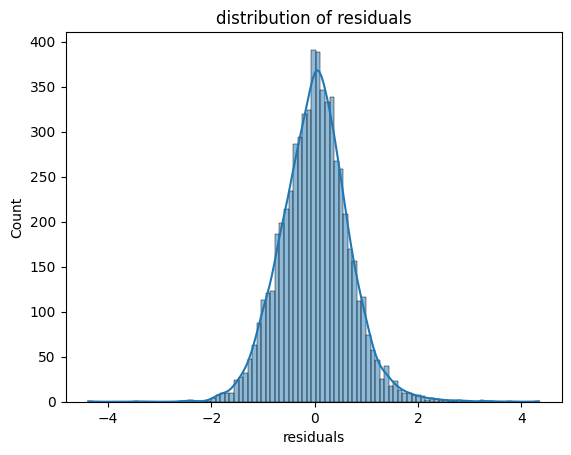

In [32]:
sns.histplot(residuals,kde=True)
plt.title('distribution of residuals')
plt.xlabel('residuals')


### residuals are norammly distirbution around 0
### residuals produced by model are random, center around 0 and symmentrically distributed
### our linear model is predicting in a biased but consistent way.


In [33]:
np.mean(residuals)  ### training residual mean is 0

np.float64(0.0073753273655593225)

In [35]:
from scipy.stats import chi2, kstest
from scipy.spatial.distance import mahalanobis
X_df = X
# Mean and covariance
mean_vec = X_df.mean().values
cov_matrix = np.cov(X_df.T)
inv_covmat = np.linalg.inv(cov_matrix)

# Mahalanobis distances
mahal = X_df.apply(lambda x: mahalanobis(x, mean_vec, inv_covmat), axis=1)
mahal_squared = mahal**2

# Step 4: Compare with Chi-square distribution
df_degrees = X_df.shape[1]
ks_stat, p_value = kstest(mahal_squared, 'chi2', args=(df_degrees,))

print(f"Kolmogorov-Smirnov Test p-value: {p_value}")


Kolmogorov-Smirnov Test p-value: 3.873963590243733e-118


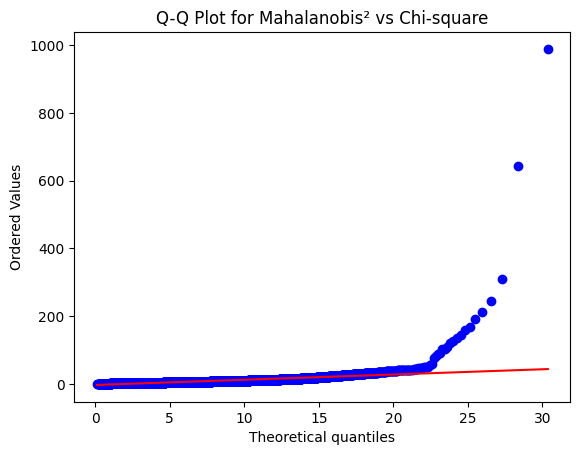

In [36]:
import matplotlib.pyplot as plt
import scipy.stats as stats

stats.probplot(mahal_squared, dist="chi2", sparams=(df_degrees,), plot=plt)
plt.title("Q-Q Plot for Mahalanobis² vs Chi-square")
plt.show()


In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Prepare your data
X = df.drop(columns=['MedHouseVal'])  # replace with your target column
y = df['MedHouseVal']

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Apply PCA
pca = PCA(n_components=0.8)  # retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: Fit Linear Regression
model = LinearRegression()
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

# Step 6: Evaluate
r2 = r2_score(y_test, y_pred)
n = X_test_pca.shape[0]
p = X_test_pca.shape[1]
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.4f}")
print(f"Adjusted R²: {adjusted_r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"Number of PCA components: {p}")


R²: 0.4329
Adjusted R²: 0.4322
MSE: 0.7431
MAE: 0.6512
Number of PCA components: 5
